In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



SyntaxError: invalid syntax. Perhaps you forgot a comma? (673489165.py, line 8)

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'D:\thesis\filtered train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    r'D:\thesis\filtered validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    r'D:\thesis\filtered test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 3014 images belonging to 334 classes.
Found 680 images belonging to 334 classes.
Found 673 images belonging to 334 classes.


In [3]:
base_model = VGG19(weights='imagenet', include_top=False,
                   input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,  # Consider increasing epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

model.save('my_model.h5')

Epoch 1/50
94/94 [==============================] - 74s 627ms/step - loss: 5.8455 - accuracy: 0.0148 - val_loss: 5.5217 - val_accuracy: 0.0402
Epoch 2/50
94/94 [==============================] - 57s 603ms/step - loss: 5.1871 - accuracy: 0.0842 - val_loss: 5.0092 - val_accuracy: 0.1250
Epoch 3/50
94/94 [==============================] - 55s 580ms/step - loss: 4.4530 - accuracy: 0.2398 - val_loss: 4.4719 - val_accuracy: 0.1964
Epoch 4/50
94/94 [==============================] - 43s 455ms/step - loss: 3.6804 - accuracy: 0.4249 - val_loss: 4.0478 - val_accuracy: 0.1979
Epoch 5/50
94/94 [==============================] - 39s 413ms/step - loss: 3.0323 - accuracy: 0.5573 - val_loss: 3.5431 - val_accuracy: 0.3690
Epoch 6/50
94/94 [==============================] - 37s 393ms/step - loss: 2.4670 - accuracy: 0.6841 - val_loss: 3.1278 - val_accuracy: 0.4747
Epoch 7/50
94/94 [==============================] - 37s 387ms/step - loss: 1.9992 - accuracy: 0.7827 - val_loss: 2.7970 - val_accuracy: 0.5610

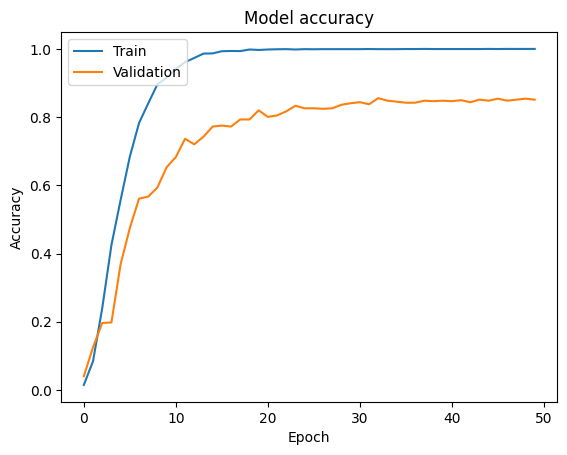

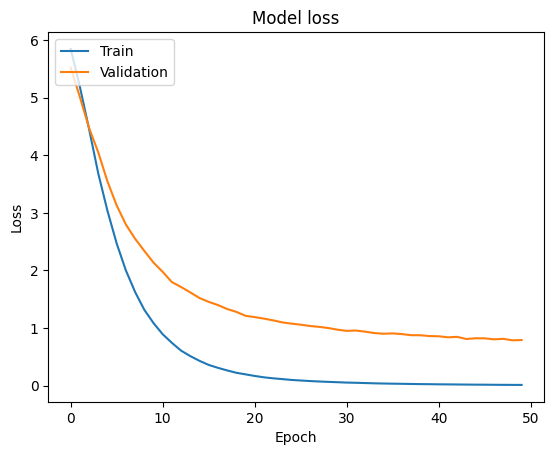

22/22 [==============================] - 9s 371ms/step - loss: 0.6968 - accuracy: 0.8782
Test accuracy: 0.8781574964523315, Test loss: 0.6967780590057373


In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

In [7]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

22/22 [==============================] - 11s 498ms/step - loss: 0.8001 - accuracy: 0.8485
Validation Accuracy: 84.85%


In [2]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.
